In [1]:
# Load all base libaries for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data from the Berka dataset:
- account: account information with the fields
- card: credit cards issued to a given account
- client: characteristics of a given client
- disp: client relationship to an account
- district: demographic relational data
- loan: loans made to each account
- order: payment order characteristics
- trans: transactions on accounts

List all the name of these variables under database

In [2]:
# Load data
account = pd.read_csv('../data/account.asc', sep=';')
card = pd.read_csv('../data/card.asc', sep=';')
client = pd.read_csv('../data/client.asc', sep=';')
disp = pd.read_csv('../data/disp.asc', sep=';')
district = pd.read_csv('../data/district.asc', sep=';')
loan = pd.read_csv('../data/loan.asc', sep=';')
order = pd.read_csv('../data/order.asc', sep=';')
trans = pd.read_csv('../data/trans.asc', sep=';')

variables = {'account':account,
             'card': card,
             'client': client,
             'disp':disp,
             'district':district,
             'loan':loan,
             'order':order,
             'trans':trans}

# Transform dates into strftime format (see http://strftime.org/)
for key in ['account', 'trans', 'loan']:
    variables[key]['date'] = pd.to_datetime(variables[key]['date'], format='%y%m%d')

C:\Users\akwn2\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Standardizing transaction labels
#
for item in xrange(0, len(variables['trans']['operation'])):
    if variables['trans']['operation'][item] == 'PREVOD NA UCET':
        variables['trans'].set_value(item, 'operation', 0)  # Bank remittance
    elif variables['trans']['operation'][item] == 'PREVOD Z UCTU':
        variables['trans'].set_value(item,'operation', 1)  # Bank collection
    elif variables['trans']['operation'][item] == 'VKLAD':
        variables['trans'].set_value(item,'operation', 2)  # Credit in cash
    elif variables['trans']['operation'][item] == 'VYBER':
        variables['trans'].set_value(item, 'operation', 3)  # Cash withraw
    elif variables['trans']['operation'][item] == 'VYBER KARTOU':
        variables['trans'].set_value(item, 'operation', 4)  # Card withraw
        

for item in xrange(0, len(variables['trans']['type'])):
    if variables['trans']['type'][item] == 'PRIJEM':
        variables['trans'].set_value(item,'type', 1)  # Credit
    elif variables['trans']['type'][item] == 'VYDAJ':
        variables['trans'].set_value(item,'type', 0)  # Withdraw


for item in xrange(0, len(variables['trans']['k_symbol'])):
    if variables['trans']['k_symbol'][item] == 'POJISTNE':
        variables['trans'].set_value(item,'k_symbol', 0)  # Insurance payment
    elif variables['trans']['k_symbol'][item] == 'SLUZBY':
        variables['trans'].set_value(item,'k_symbol', 1)  # Statement payment
    elif variables['trans']['k_symbol'][item] == 'UROK':
        variables['trans'].set_value(item,'k_symbol', 2)  # Interest credited
    elif variables['trans']['k_symbol'][item] == 'SANKC. UROK':
        variables['trans'].set_value(item,'k_symbol', 3)  # Overdraft penalty
    elif variables['trans']['k_symbol'][item] == 'SIPO':
        variables['trans'].set_value(item,'k_symbol', 4)  # household payment
    elif variables['trans']['k_symbol'][item] == 'DUCHOD':
        variables['trans'].set_value(item,'k_symbol', 5)  # Pension
    elif variables['trans']['k_symbol'][item] == 'UVER':
        variables['trans'].set_value(item,'k_symbol', 6)  # Loan payment


In [4]:
# Standardizing account data
for item in xrange(0, len(variables['account']['frequency'])):
    if variables['account']['frequency'][item] == 'POPLATEK MESICNE':
        variables['account'].set_value(item,'frequency', 0)  # Monthly 
    elif variables['account']['frequency'][item] == 'POPLATEK PO OBRATU':
        variables['account'].set_value(item,'frequency', 1)  # After transaction
    elif variables['account']['frequency'][item] == 'POPLATEK TYDNE':
        variables['account'].set_value(item,'frequency', 2)  # Weekly

In [5]:
# Standardizing card data
for item in xrange(0, len(variables['card']['type'])):
    if variables['card']['type'][item] == 'junior':
        variables['card'].set_value(item,'type', 0)  # Basic credit card
    elif variables['card']['type'][item] == 'classic':
        variables['card'].set_value(item,'type', 1)  # Standard credit card
    elif variables['card']['type'][item] == 'gold':
        variables['card'].set_value(item,'type', 2)  # Premium credit card

In [6]:
# Combine account data with geographical information
customer = pd.merge(variables['account'], variables['district'].rename(columns={'A1': 'district_id'}))
transact = variables['trans']

In [7]:
transact.head

<bound method DataFrame.head of          trans_id  account_id       date type operation   amount  balance  \
0          695247        2378 1993-01-01    1         2    700.0    700.0   
1          171812         576 1993-01-01    1         2    900.0    900.0   
2          207264         704 1993-01-01    1         2   1000.0   1000.0   
3         1117247        3818 1993-01-01    1         2    600.0    600.0   
4          579373        1972 1993-01-02    1         2    400.0    400.0   
5          771035        2632 1993-01-02    1         2   1100.0   1100.0   
6          452728        1539 1993-01-03    1         2    600.0    600.0   
7          725751        2484 1993-01-03    1         2   1100.0   1100.0   
8          497211        1695 1993-01-03    1         2    200.0    200.0   
9          232960         793 1993-01-03    1         2    800.0    800.0   
10         505240        1726 1993-01-03    1         2   1000.0   1000.0   
11         144541         485 1993-01-04    

In [8]:
customer.head

<bound method DataFrame.head of       account_id  district_id frequency       date             A2  \
0            576           55         0 1993-01-01  Brno - venkov   
1            704           55         0 1993-01-01  Brno - venkov   
2            192           55         0 1993-01-08  Brno - venkov   
3          10364           55         0 1993-01-17  Brno - venkov   
4            497           55         0 1993-04-15  Brno - venkov   
5          10105           55         0 1993-04-28  Brno - venkov   
6           4225           55         0 1993-05-18  Brno - venkov   
7           1851           55         0 1993-05-23  Brno - venkov   
8           2029           55         0 1993-05-29  Brno - venkov   
9           5215           55         0 1993-07-01  Brno - venkov   
10          1689           55         0 1993-09-07  Brno - venkov   
11          1440           55         0 1993-09-22  Brno - venkov   
12           243           55         2 1993-11-06  Brno - venkov   
13

In [9]:
db = pd.merge(customer, transact)

In [10]:
db.head

<bound method DataFrame.head of       account_id  district_id frequency       date             A2  \
0            576           55         0 1993-01-01  Brno - venkov   
1            704           55         0 1993-01-01  Brno - venkov   
2            192           55         0 1993-01-08  Brno - venkov   
3          10364           55         0 1993-01-17  Brno - venkov   
4            497           55         0 1993-04-15  Brno - venkov   
5          10105           55         0 1993-04-28  Brno - venkov   
6           4225           55         0 1993-05-18  Brno - venkov   
7           1851           55         0 1993-05-23  Brno - venkov   
8           2029           55         0 1993-05-29  Brno - venkov   
9           5215           55         0 1993-07-01  Brno - venkov   
10          1689           55         0 1993-09-07  Brno - venkov   
11          1440           55         0 1993-09-22  Brno - venkov   
12           243           55         2 1993-11-06  Brno - venkov   
13

In [11]:
print transact.columns
print customer.columns

Index([u'trans_id', u'account_id', u'date', u'type', u'operation', u'amount',
       u'balance', u'k_symbol', u'bank', u'account'],
      dtype='object')
Index([u'account_id', u'district_id', u'frequency', u'date', u'A2', u'A3',
       u'A4', u'A5', u'A6', u'A7', u'A8', u'A9', u'A10', u'A11', u'A12',
       u'A13', u'A14', u'A15', u'A16'],
      dtype='object')


In [12]:
acc_balance = list()
acc_date = list()
for acc in np.unique(transact['account_id']):
    x = transact.loc[transact['account_id'] == acc,:]
    acc_date.append(x['date'])
    acc_balance.append(x['balance'])

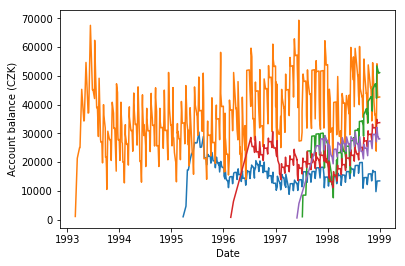

In [13]:
for ii in xrange(0, 5):
    plt.plot(acc_date[ii], acc_balance[ii])

plt.ylabel(r'Account balance (CZK)')
plt.xlabel(r'Date')
plt.show()

In [14]:
acc_deltas = list()
delta_time = list()
for acc_idx in xrange(0, len(acc_balance)):
    balance = np.asarray(acc_balance[acc_idx])
    acc_deltas.append(balance[1:] - balance[0:-1])
    delta_time.append(np.asarray(acc_date[acc_idx])[0:-1])

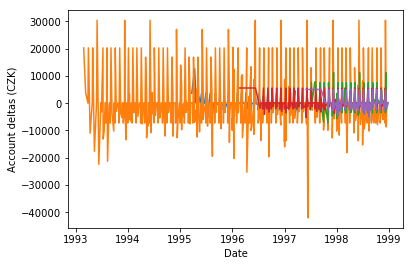

In [15]:
for ii in xrange(0, 5):
    plt.plot(delta_time[ii], acc_deltas[ii])

plt.ylabel(r'Account deltas (CZK)')
plt.xlabel(r'Date')
plt.show()

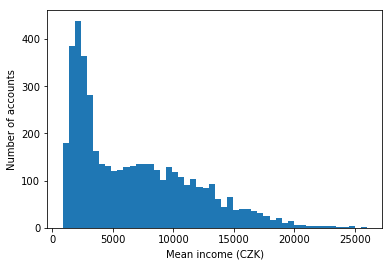

In [16]:
mean_income = np.zeros([len(acc_deltas), 1])

for ii in xrange(0, len(acc_deltas)):
    mean_income[ii] = np.mean(acc_deltas[ii][acc_deltas[ii][:] > 0])
    
plt.ylabel(r'Number of accounts')
plt.xlabel(r'Mean income (CZK)')
plt.hist(mean_income, 50)
plt.show()

In [17]:
acc_income = pd.DataFrame({
    'account_id': list(np.unique(transact['account_id'])),
    'mean_income': list(mean_income),
})

transact = pd.merge(transact, acc_income)
db = pd.merge(customer, transact)

In [18]:
transact.head

<bound method DataFrame.head of          trans_id  account_id       date type operation   amount   balance  \
0          695247        2378 1993-01-01    1         2    700.0     700.0   
1          695250        2378 1993-01-22    1         2   7268.0    7968.0   
2          695266        2378 1993-01-23    1         2  14440.0   22408.0   
3          695262        2378 1993-01-24    1         2  49752.0   72160.0   
4          695265        2378 1993-01-26    1         2  21899.0   94059.0   
5          695560        2378 1993-01-31    0         3  34700.0   59453.7   
6         3608592        2378 1993-01-31    1       NaN     94.7   94153.7   
7          695272        2378 1993-02-05    1         2  30192.0   89645.7   
8          695340        2378 1993-02-07    0         0   9612.0   80033.7   
9          695270        2378 1993-02-11    1         2  31038.0  111071.7   
10         695561        2378 1993-02-11    0         3  25200.0   85871.7   
11         695251        2378 19

In [19]:
transact.to_csv('transactions.csv')
customer.to_csv('customers.csv')
db.to_csv('database.csv')